In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


# Missing data replacement (Data imputation)

Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise 
to identify and replace the missing values in each column of the dataset to perform predictive modeling.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [4]:
for col in df:
    missing_data = df[col].isnull().sum()
    missing_percent = missing_data/len(df[col]) * 100;
    print("The percentage of missing values of column {} is ".format(col) + str(missing_percent) + "%")

The percentage of missing values of column Country is 0.0%
The percentage of missing values of column Age is 10.0%
The percentage of missing values of column Salary is 10.0%
The percentage of missing values of column Purchased is 0.0%


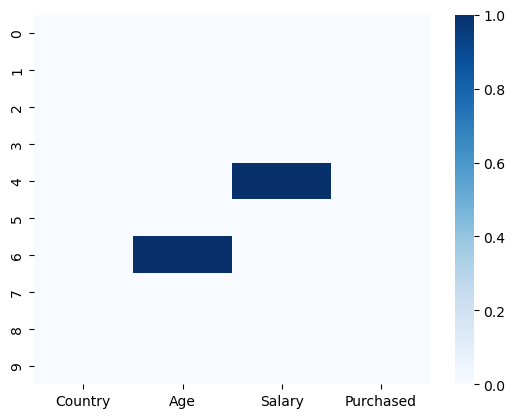

In [5]:
fig, ax = plt.subplots()
sns.heatmap(df.isnull(), cmap = "Blues");

In [6]:
x = df.iloc[:, :-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [7]:
y = df.iloc[:, -1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [8]:
from sklearn.impute import SimpleImputer

# create an instance of Class SimpleImputer: np.nan is the empty value in the dataset

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
x[:, 1:3] = imputer.fit_transform(x[:, 1:3])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encode Categorical Data

## Encode independent variable (X)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [0])], remainder = "passthrough")
x = ct.fit_transform(x)
x # has 5 columns is: (France, Ger, Spain, Age, Salary)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

## Encode dependent variable (Y)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting the dataset (x = input, y = output) into training set and test set

In [11]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [12]:
print(x_train)
print(y_train)

[[1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]]
[1 0 1 0 1 1 0 0]


# Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train[:, 3:5] = sc.fit_transform(x_train[:, 3:5])
x_train

array([[1.0, 0.0, 0.0, -0.7529426005471074, -0.6260377781240922],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.013042950055349],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450698],
       [0.0, 1.0, 0.0, -1.7314961608249366, -1.0943465576039326],
       [1.0, 0.0, 0.0, -0.3615211764359758, 0.4276569757055486],
       [0.0, 1.0, 0.0, 0.22561095973072173, 0.05040823668012205],
       [0.0, 0.0, 1.0, -0.16581046438040992, -0.274806193514212],
       [0.0, 0.0, 1.0, -0.013591021670525248, -1.328500947343853]],
      dtype=object)

In [19]:
x_test[:, 3:] = sc.transform(x_test[:, 3:])
x_test

array([[0.0, 1.0, 0.0, 1.0, 1.0000000000000004],
       [0.0, 0.0, 1.0, -0.9999999999999996, -0.9999999999999996]],
      dtype=object)